# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io, img_as_ubyte, exposure # useful for image loading and saving / convert uint8 / contrast
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage.color import rgb2gray # useful for convert image to grayscale
from skimage.transform import resize # useful for resizing images

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [2]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

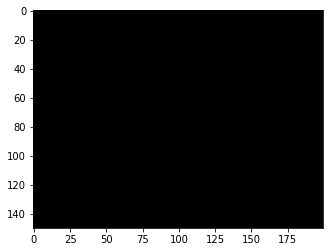

In [3]:
#Your solution
img = np.zeros((150,200), dtype=np.uint8)
plt.imshow(img, cmap='gray')
plt.show()

How many values can each pixel have in this case? 

#### Your solution

R: 256 values

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

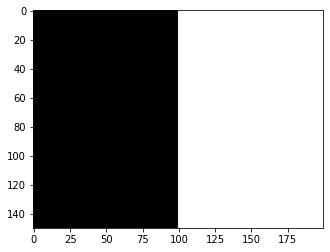

In [4]:
#Your solution
rows, columns = img.shape
img[:,columns//2:] = np.full((rows,columns//2), 255)
plt.imshow(img, cmap='gray')
plt.show()

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [5]:
#Your solution
io.imsave('black_and_white.jpg', img)

b) Load the saved image and visualize it:

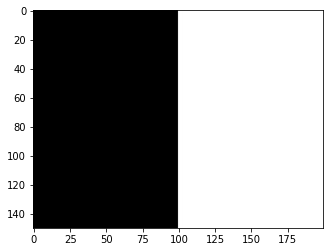

In [6]:
#Your solution
loaded_img = io.imread('black_and_white.jpg')
plt.imshow(loaded_img, cmap='gray')
plt.show()

### 1.3 Images manipulation and image masks

a) Load and show the image lenna.jpg, and check its dimensions. Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. We recommend to create a bigger black image to later embed the original image in the central part.

----> Original image


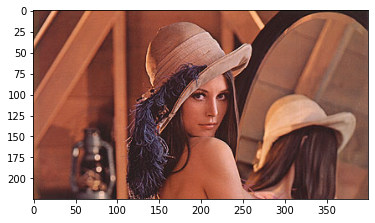

Original shape: (225, 400, 3)

----> Black image


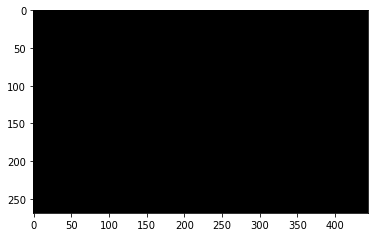

Shape of black frame: (269, 444, 3)

----> Framed image


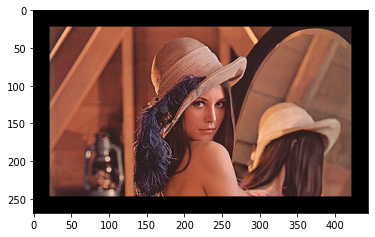

Shape of framed image: (269, 444, 3)


In [7]:
#Your solution
print("----> Original image")
lenna = io.imread('images/lenna.jpg')
shape = lenna.shape
plt.imshow(lenna)
plt.show()
print("Original shape:", shape)

border = shape[0]//10
print("\n----> Black image")
black_frame = np.zeros((shape[0]+border*2, shape[1]+border*2, 3), dtype=np.uint8)
plt.imshow(black_frame)
plt.show()
print("Shape of black frame:", black_frame.shape)

print("\n----> Framed image")
framed_img = black_frame.copy()
framed_img[border:shape[0]+border, border:shape[1]+border] = lenna[:, :]    
plt.imshow(framed_img)
plt.show()
print("Shape of framed image:", framed_img.shape)

b) Change the mask of the framed image to red. Visualize the three images with their respective titles.

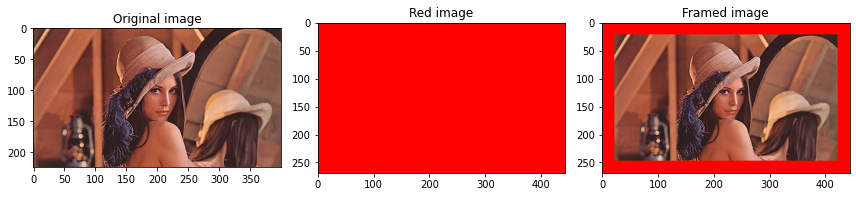

In [8]:
#Your solution

# Original image
lenna = io.imread('images/lenna.jpg')

# Red frame
red_frame = np.full((shape[0]+border*2, shape[1]+border*2, 3), (255,0,0), dtype=np.uint8)

# Framed image
framed_img = red_frame.copy()
framed_img[border:shape[0]+border, border:shape[1]+border] = lenna[:, :]    

# Show images
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(lenna)
ax[0].set_title("Original image")
ax[1].imshow(red_frame, cmap='gray')
ax[1].set_title("Red image")
ax[2].imshow(framed_img, cmap='gray')
ax[2].set_title("Framed image")

fig.tight_layout() # Perque no es tallin els títols
plt.show()

### 1.4 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

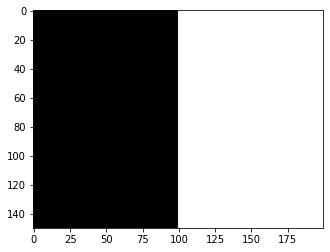

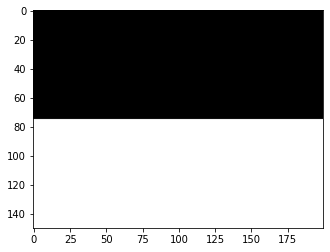

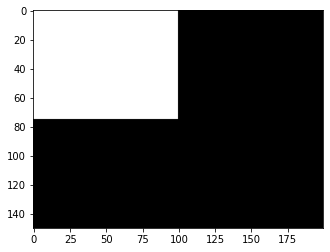

In [9]:
#Your solution
img = np.zeros((150,200), dtype=np.uint8)
rows, columns = img.shape

# First image
img1 = np.copy(img)
img1[:,columns//2:] = np.full((rows,columns//2), 255)
plt.imshow(img1, cmap='gray')
plt.show()

# Second image
img2 = np.copy(img)
img2[rows//2:,:] = np.full((rows//2,columns), 255)
plt.imshow(img2, cmap='gray')
plt.show()

# Third image
img3 = np.copy(img)
img3[:rows//2,:columns//2] = np.full((rows//2,columns//2), 255)
plt.imshow(img3, cmap='gray')
plt.show()

b) Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

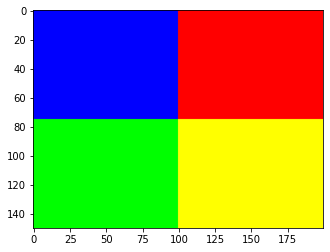

In [10]:
#Your solution
colored = np.zeros((150,200,3), dtype=np.uint8)
colored[:,:,0] = img1
colored[:,:,1] = img2
colored[:,:,2] = img3

plt.imshow(colored)
plt.show()

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

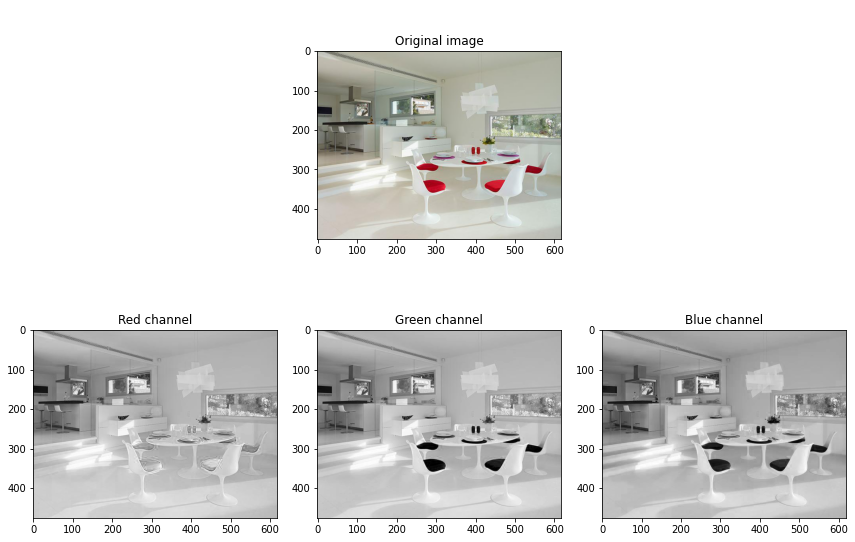

In [11]:
#Your solution
original = io.imread('images/sillas.jpg')

r = original[:,:,0]
g = original[:,:,1]
b = original[:,:,2]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].axis('off')
ax[1].imshow(original)
ax[1].set_title("Original image")
ax[2].axis('off')
ax[3].imshow(r, cmap='gray')
ax[3].set_title("Red channel")
ax[4].imshow(g, cmap='gray')
ax[4].set_title("Green channel")
ax[5].imshow(b, cmap='gray')
ax[5].set_title("Blue channel")

fig.tight_layout() # Perque no es tallin els títols
plt.show()

### 1.5 Color image conversion

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

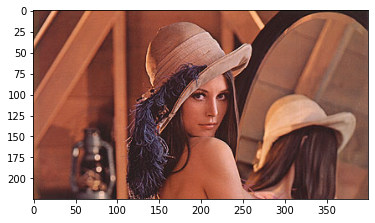

Dimensions: (225, 400, 3)


In [12]:
#Your solution
lenna = io.imread('images/lenna.jpg')
dimensions = lenna.shape
plt.imshow(lenna)
plt.show()
print("Dimensions:", dimensions)

b) Convert the previous image to grayscale, visualize and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values.

RGB scaled image
Details: (225, 400, 3) uint8 0 255


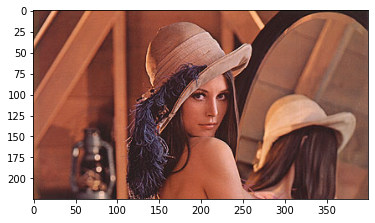

Grayscaled image
Details: (225, 400) float64 0.0014137254901960784 0.9869937254901961


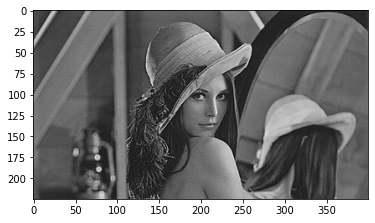

In [13]:
#Your solution
print("RGB scaled image")
print("Details:", lenna.shape, lenna.dtype, lenna.min(), lenna.max())
plt.imshow(lenna)
plt.show()

print("Grayscaled image")
lenna_gray = rgb2gray(lenna) 
print("Details:", lenna_gray.shape, lenna_gray.dtype, lenna_gray.min(), lenna_gray.max())
plt.imshow(lenna_gray, cmap='gray')
plt.show()
lenna_gray = img_as_ubyte(lenna_gray) # Convert image to uint8 to suppress the warn
io.imsave('lenna_gray.jpg', lenna_gray)

c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

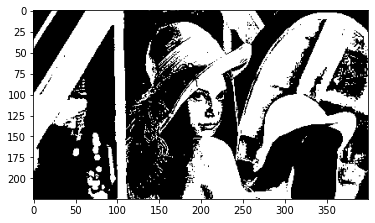

Range of the values: 0 1
10th row: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
#Your solution
lenna_gray = img_as_ubyte(lenna_gray)
lenna_boolean = np.copy(lenna_gray)
lenna_boolean[lenna_gray <= 100] = 0
lenna_boolean[lenna_gray > 100] = 1
plt.imshow(lenna_boolean, cmap='gray')
plt.show()

print("Range of the values:", lenna_boolean.min(), lenna_boolean.max())
print("10th row:", lenna_boolean[9])

d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

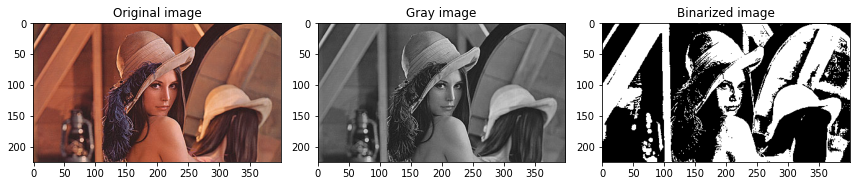

In [15]:
#Your solution
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(lenna)
ax[0].set_title("Original image")
ax[1].imshow(lenna_gray, cmap='gray')
ax[1].set_title("Gray image")
ax[2].imshow(lenna_boolean, cmap ='gray')
ax[2].set_title("Binarized image")

fig.tight_layout() # Perque no es tallin els títols
plt.show()

### 1.6 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

Note: When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default.

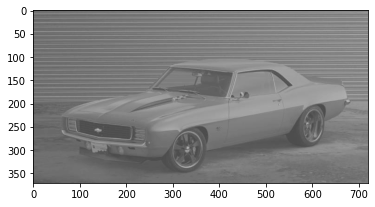

Details: (371, 720) uint8 63 193


In [16]:
#Your solution
car = io.imread('images/car_lowContrast.jpg')
plt.imshow(car, vmin=0, vmax=255, cmap='gray')
plt.show()
print("Details:", car.shape, car.dtype, car.min(), car.max())

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

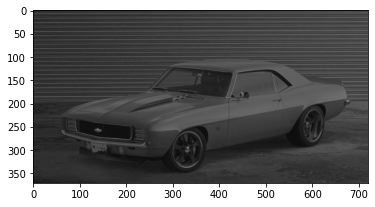

Details: (371, 720) uint8 0 130


In [17]:
#Your solution
dark_image = np.copy(car)
dark_image -= dark_image.min()
plt.imshow(dark_image, vmin=0, vmax=255, cmap='gray')
plt.show()
print("Details:",dark_image.shape, dark_image.dtype, dark_image.min(), dark_image.max())

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

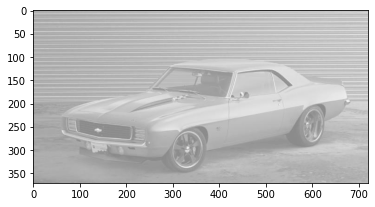

Details: (371, 720) uint8 125 255


In [18]:
#Your solution
bright_im = np.copy(car)
bright_im += 255 - bright_im.max()
plt.imshow(bright_im, vmin=0, vmax=255, cmap='gray')
plt.show()
print("Details:", bright_im.shape, bright_im.dtype, bright_im.min(), bright_im.max())

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one. 

Implement the contrast enhancement using the two different available methods.

Original details: (371, 720) uint8 63 193


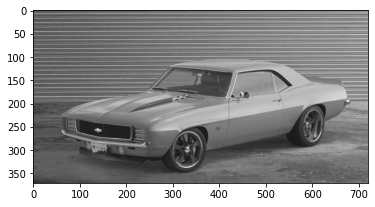

Details after manual contrast enhancement: (371, 720) float64 0.0 255.0


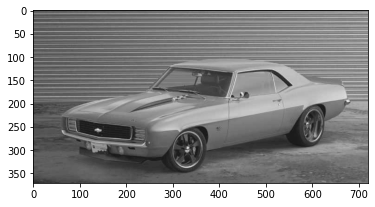

Details after scikit contrast enhancement: (371, 720) uint8 0 255


In [19]:
#Your solution
# By direct manipulation
# Formula: BV_out = ((BV_in - min)/(max - min)) * 255
print("Original details:", car.shape, car.dtype, car.min(), car.max())
car_contrasted = ((car - car.min())/(car.max() - car.min())) * 255
# car_contrasted = np.asarray(car_contrasted, dtype=car.dtype) # convert to uint8
plt.imshow(car_contrasted, vmin=0, vmax=255, cmap='gray')
plt.show()
print("Details after manual contrast enhancement:", car_contrasted.shape, car_contrasted.dtype, car_contrasted.min(), car_contrasted.max())

# Through scikit-image command
car_exposure = exposure.rescale_intensity(car)
plt.imshow(car_exposure, vmin=0, vmax=255, cmap='gray')
plt.show()
print("Details after scikit contrast enhancement:", car_exposure.shape, car_exposure.dtype, car_exposure.min(), car_exposure.max())

e) Visualize the 5 images in the same figure, each one with its corresponding title.

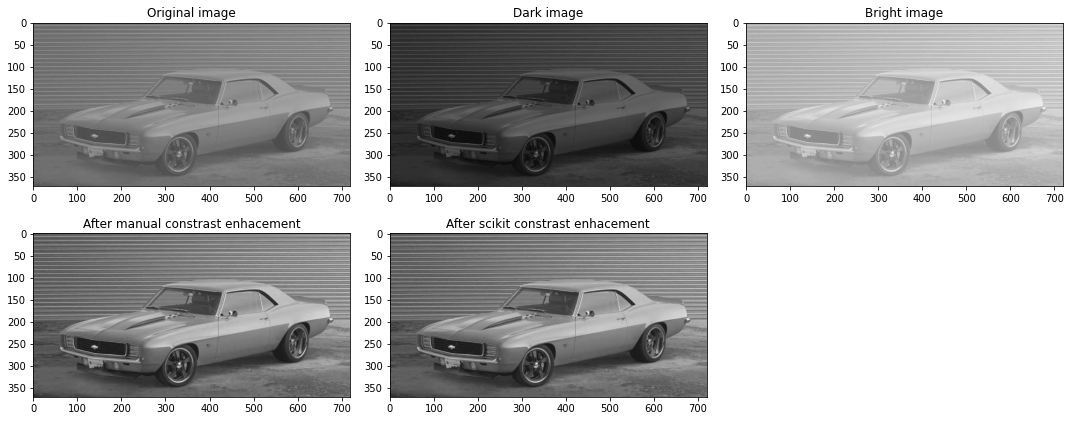

In [20]:
#Your solution
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
ax = axes.ravel()


ax[0].imshow(car, vmin=0, vmax=255, cmap='gray')
ax[0].set_title("Original image")
ax[1].imshow(dark_image, vmin=0, vmax=255, cmap='gray')
ax[1].set_title("Dark image")
ax[2].imshow(bright_im, vmin=0, vmax=255, cmap='gray')
ax[2].set_title("Bright image")
ax[3].imshow(car_contrasted, vmin=0, vmax=255, cmap='gray')
ax[3].set_title("After manual constrast enhacement")
ax[4].imshow(car_exposure, vmin=0, vmax=255, cmap='gray')
ax[4].set_title("After scikit constrast enhacement")
ax[5].axis('off')

fig.tight_layout() # Perque no es tallin els títols
plt.show()

### 1.7 Masks and logical image manipulation

a) Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

Details original image: (777, 934, 3) uint8 0 255
Details grayscale image: (777, 934) float64 0.0 1.0
Details left circle image: (777, 934) float64 0.0 1.0
Details central circle image: (777, 934) float64 0.4980392156862745 1.0
Details right circle image: (777, 934) float64 0.7647058823529411 1.0


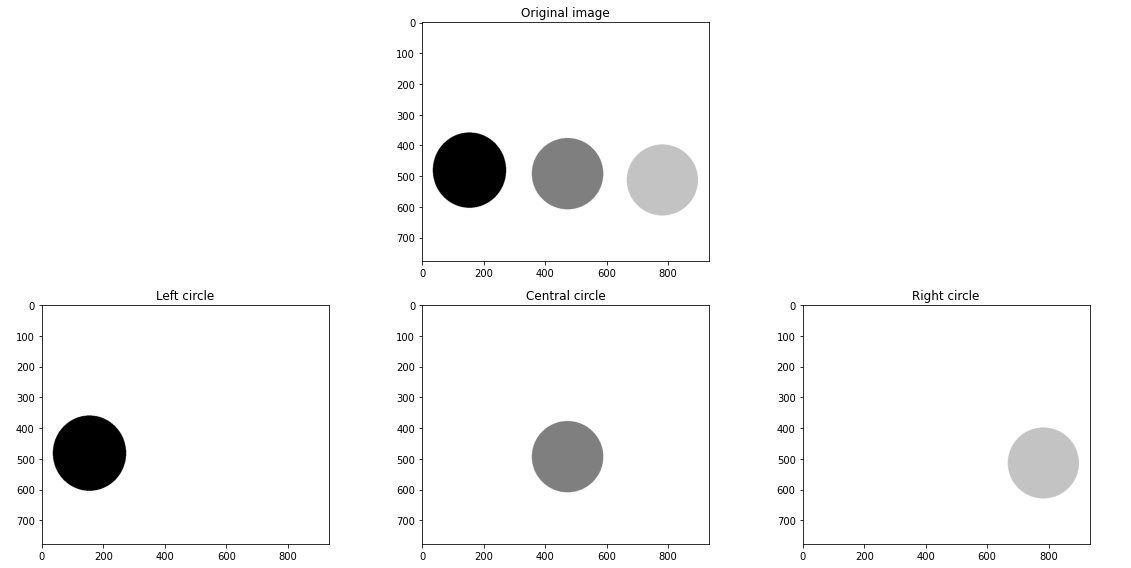

In [21]:
#Your solution
# Original image
circles = io.imread('images/circles.bmp')
print("Details original image:", circles.shape, circles.dtype, circles.min(), circles.max())

# Grayscale image
circles_gray = rgb2gray(circles)
print("Details grayscale image:", circles_gray.shape, circles_gray.dtype, circles_gray.min(), circles_gray.max())
# print(circles_gray[500]) # Check topographic map

# Left Circle
left = np.where(circles_gray == 0, circles_gray, 1)
print("Details left circle image:", left.shape, left.dtype, left.min(), left.max())

# Central Circle
central = np.where((circles_gray < 0.6) & (circles_gray > 0.4), circles_gray, 1)
print("Details central circle image:", central.shape, central.dtype, central.min(), central.max())

# Right Circle
right = np.where((circles_gray < 0.8) & (circles_gray > 0.6), circles_gray, 1)
print("Details right circle image:", right.shape, right.dtype, right.min(), right.max())

# Show the images
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
ax = axes.ravel()

ax[0].axis('off')
ax[1].imshow(circles)
ax[1].set_title("Original image")
ax[2].axis('off')
ax[3].imshow(left, cmap = 'gray')
ax[3].set_title("Left circle")
ax[4].imshow(central, cmap = 'gray', vmin=0, vmax=1)
ax[4].set_title("Central circle")
ax[5].imshow(right, cmap = 'gray', vmin=0, vmax=1)
ax[5].set_title("Right circle")

fig.tight_layout() # Perque no es tallin els títols
plt.show()

b) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

Details of model  image: (1188, 915, 4) uint8 0 255
Topographic map of 500º row: [[  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 ...
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]]


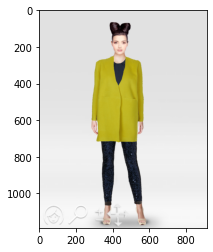

In [22]:
#Your solution
coat = io.imread('images/coat.png')
model = io.imread('images/model.png')

print("Details of model  image:", model.shape, model.dtype, model.min(), model.max())
print("Topographic map of 500º row:", coat[500])
person = np.where(coat != 0, coat, model)

plt.imshow(person)
plt.show()

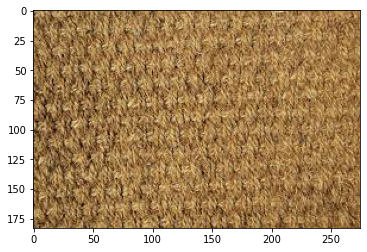

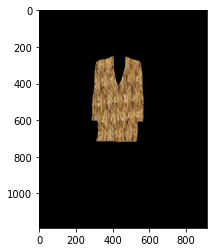

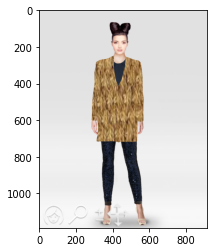

In [23]:
#Your solution
# Retrieving texture
texture = io.imread("images/texture.png")
plt.imshow(texture)
plt.show()

# Texture application
texture = resize(texture, (coat.shape[0], coat.shape[1]), anti_aliasing=True)
texture = np.dstack( (texture, np.ones((coat.shape[0], coat.shape[1]))) ) # RGB to RGBA with ones
new_coat = np.where(coat != 0, texture, coat)
new_coat = img_as_ubyte(new_coat)
plt.imshow(new_coat)
plt.show()

# Apply to the model
person = np.where(new_coat != 0, new_coat, model)
plt.imshow(person)
plt.show()

## Delivery

Compressed file **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): September 28, 11:00 p.m.** 